## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="right")
# Display the data table for preview
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_number = len(combine_data_df["Mouse ID"].unique())

mouse_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

num_mice_ID = combine_data_df.loc[combine_data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()


num_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

unique_locate = combine_data_df.loc[combine_data_df["Mouse ID"] == "g989"]
unique_locate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = combine_data_df.loc[combine_data_df["Mouse ID"] != "g989"]


clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaner_mouse_df = len(clean_mice_df["Mouse ID"].unique())
cleaner_mouse_df 

248

## Summary Statistics

In [7]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Finds the average tumor level for each Drug Regimen 
mouse_average = clean_mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

# Finds the median tumor level for each Drug Regimen 
mouse_median = clean_mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

# Finds the variance between subjects in tumor level for each Drug Regimen 
mouse_variance =  clean_mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

# Finds the standard deviation in variance in tumor level for each Drug Regimen 
mouse_std = clean_mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# Finds the standard of errors for each Drug Regimen 
mouse_sem = clean_mice_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]


# Creates a dataframe using the series' above
summary_stats_df = pd.DataFrame ({
                                "Average": mouse_average,
                                "Median" : mouse_median,
                                "Variance" : mouse_variance,
                                "Standard Deviation" : mouse_std,
                                "Standard Of Errors" : mouse_sem
})

summary_stats_df

,Average,Median,Variance,Standard Deviation,Standard Of Errors
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_mice_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)' : ["mean", "median", "var","std","sem"]})
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

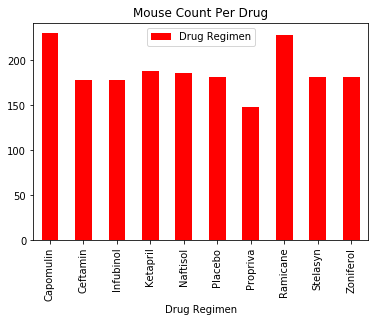

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

drug_group = clean_mice_df.groupby("Drug Regimen")
drug_group_count = pd.DataFrame(drug_group["Drug Regimen"].count())
count_chart = drug_group_count.plot(kind='bar', title="Mouse Count Per Drug", color="red")



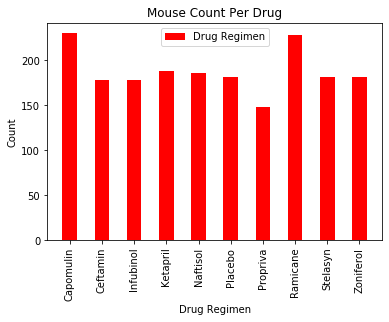

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='red', align="center", width = 0.45)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Mouse Count Per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")


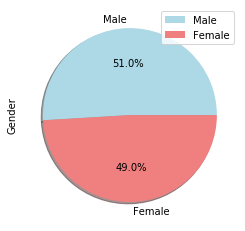

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["lightblue", "lightcoral"]
# Retrieves the length of male mice or the number of
male = len(clean_mice_df.loc[(clean_mice_df["Sex"] == "Male")])
# Retrieves the length of female mice or the number of
female = len(clean_mice_df.loc[(clean_mice_df["Sex"] == "Female")])

# Takes the above varaibles and converts it into a dataframe
male_female = pd.DataFrame({"Gender" :[male, female]},
                  index=["Male", "Female"])

# Plots the above dataframe into a pie graph
plot = male_female.plot.pie(y="Gender",colors =colors,autopct='%1.1f%%', shadow=True)

([<matplotlib.patches.Wedge at 0x1c4fa384e88>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

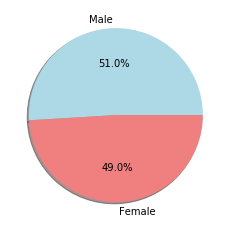

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# set's labels and colors for the pie graph we are abotu to make
labels = ["Male", "Female"]
colors = ["lightblue", "lightcoral"]

# Retrieves the length of male mice or the number of
male = len(clean_mice_df.loc[(clean_mice_df["Sex"] == "Male")])
# Retrieves the length of female mice or the number of
female = len(clean_mice_df.loc[(clean_mice_df["Sex"] == "Female")])

# puts our two variables into a list
sex = [male, female]
# Plots the abvoe list, the labels we created, the colors we set, and adds shadow into a pie graph
plt.pie(sex, labels = labels, colors=colors,autopct='%1.1f%%', shadow=True)

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Create a list of the select drugs : 'Capomulin', 'Ramicane', 'Infubinol', and 'Ceftamin' 
select_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Use isin function to slice the clean_mice_df to only include the selectd drugs
select_drugs_df = clean_mice_df[clean_mice_df['Drug Regimen'].isin(select_drugs)]

# View the newly created subset dataframe
select_drugs_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Takes the abvoe dataframe and groups the data into Drug Regimen and Mouse ID
tumor = select_drugs_df.groupby(['Drug Regimen','Mouse ID'])

# Retrieves the Largest Tumor of each mouse
largest_tumor = tumor.max()["Tumor Volume (mm3)"]

# Creates a dataframe showcasing each drug, each unique Mouse ID and the largest tumor for each Mouse ID that was under the
# selected drug regimen 
drug_mouse_tumor_df = pd.DataFrame ({"Largest Tumor" : largest_tumor 
    
})

drug_mouse_tumor_df 

Largest Tumor
Drug Regimen Mouse ID               
Capomulin    b128          45.651331
             b742          45.000000
             f966          45.000000
             g288          46.304003
             g316          46.809225
...                              ...
Ramicane     s508          45.000000
             u196          47.622816
             w678          45.000000
             y449          46.378092
             z578          45.000000

[100 rows x 1 columns]

In [15]:
# Put treatments into a list for for loop (and later for plot labels) (Class 3 1:07:00)
select_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

boxplot_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.    
# Determine outliers using upper and lower bounds
counter = 0

for drug in select_drugs:
    quartiles = drug_mouse_tumor_df["Largest Tumor"].quantile([0.25,0.5,0.75])
    first_quartile = quartiles[0.25]
    median = quartiles[0.5]
    third_quartile = quartiles[0.75]
    iqr = third_quartile - first_quartile
    lower_bound = first_quartile - (1.5*iqr)
    upper_bound = third_quartile + (1.5*iqr)
    
    if counter == 0:
        print(f"{drug} Statistics\n"
           "----------------------------\n"
           f"First Quartile:  {first_quartile}\n"
           f"Median:  {median}\n"
           f"Third Quartile:  {third_quartile}\n"
           f"Interquartile Range:  {iqr}\n"
           f"Lowerbound Outliers:  {lower_bound}\n"
           f"Upperbound Outliers:  {upper_bound}\n")
        
counter +=1
    
 


Capomulin Statistics
----------------------------
First Quartile:  45.5098442875
Median:  46.860058175
Third Quartile:  59.930261755000004
Interquartile Range:  14.420417467500002
Lowerbound Outliers:  23.87921808625
Upperbound Outliers:  81.56088795625001

Ramicane Statistics
----------------------------
First Quartile:  45.5098442875
Median:  46.860058175
Third Quartile:  59.930261755000004
Interquartile Range:  14.420417467500002
Lowerbound Outliers:  23.87921808625
Upperbound Outliers:  81.56088795625001

Infubinol Statistics
----------------------------
First Quartile:  45.5098442875
Median:  46.860058175
Third Quartile:  59.930261755000004
Interquartile Range:  14.420417467500002
Lowerbound Outliers:  23.87921808625
Upperbound Outliers:  81.56088795625001

Ceftamin Statistics
----------------------------
First Quartile:  45.5098442875
Median:  46.860058175
Third Quartile:  59.930261755000004
Interquartile Range:  14.420417467500002
Lowerbound Outliers:  23.87921808625
Upperbound 

In [16]:
# Locate the rows which contain mice on each drug and get the tumor volumes
mouse_locate =  drug_mouse_tumor_df.iloc[[0, 1, 2]]
    
# add subset 
subset = drug_mouse_tumor_df.iloc[range(75,100)]

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

for drug in select_drugs:
    boxplot_list.append((drug_mouse_tumor_df[drug].dropna()))



KeyError: 'Capomulin'

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
linregress(drug_mouse_tumor_df["Largest Tumor"])